In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

In [5]:
df = pd.read_csv('../datafiles/CO_2014_2015.csv')

In [6]:
df.head()

,Age,StateProvinceCode,CustomerLifetimeSpend,Customer1YearSpend,Customer3YearSpend,ThreeYearVisitCount,SkiLoyaltyIndexRating,FrontRangeMarket,CustId,Spend_Winter_2010,...,April_15,November_14,December_14,Total_Days_14_15,Total_Days_13_14,Ski_Resort1_2014_2015,Ski_Resort2_2014_2015,Ski_Resort3_2014_2015,Ski_Resort4_2014_2015,Ski_Resort5_2014_2015
0,42,CO,55.61,0.0,42.43,19,10.0,1,1073873,0.0,...,0,0,1,7,0,0,0,0,0,7
1,48,CO,139.00,0.0,139.00,24,0.0,1,1073874,0.0,...,0,0,0,2,2,0,0,2,0,0
2,48,CO,428.00,0.0,0.00,13,0.0,1,1073876,59.0,...,0,0,0,2,4,0,0,1,0,1
3,33,CO,449.00,0.0,0.00,0,0.0,0,1073942,0.0,...,0,0,0,0,0,0,0,0,0,0
4,24,CO,148.19,0.0,148.19,2,0.0,1,1073956,0.0,...,0,1,0,4,0,0,0,0,0,4


In [315]:
df.shape

(139616, 45)

In [316]:
df.columns

Index(['Age', 'StateProvinceCode', 'CustomerLifetimeSpend',
       'Customer1YearSpend', 'Customer3YearSpend', 'ThreeYearVisitCount',
       'SkiLoyaltyIndexRating', 'FrontRangeMarket', 'CustId',
       'Spend_Winter_2010', 'Spend_Winter_2011', 'Spend_Winter_2012',
       'Spend_Winter_2013', 'Spend_Winter_2014', 'Spend_Winter_2015',
       'Household1YearSpend', 'Household3YearSpend', 'HouseholdLifetimeSpend',
       'NumberOfHouseholdMembers', 'NumberOfAdults', 'NumberOfChildren',
       'Pass_Winter_2010', 'Pass_Winter_2011', 'Pass_Winter_2012',
       'Pass_Winter_2013', 'Pass_Winter_2014', 'Pass_Winter_2015',
       'CustomerId', 'Early_Purchase_2014_2015', 'Regular_Purchase_2014_2015',
       'Late_Purchase_2014_2015', 'Super_Late_Purchase_2014_2015',
       'January_15', 'February_15', 'March_15', 'April_15', 'November_14',
       'December_14', 'Total_Days_14_15', 'Total_Days_13_14',
       'Ski_Resort1_2014_2015', 'Ski_Resort2_2014_2015',
       'Ski_Resort3_2014_2015', 'Ski_R

In [317]:
cols = ['Age', 'CustomerLifetimeSpend',
       'Customer1YearSpend', 'Customer3YearSpend', 'ThreeYearVisitCount',
       'SkiLoyaltyIndexRating', 'FrontRangeMarket',
       'Spend_Winter_2010', 'Spend_Winter_2011', 'Spend_Winter_2012',
       'Spend_Winter_2013', 'Spend_Winter_2014', #'Spend_Winter_2015',
       'Household1YearSpend', 'Household3YearSpend', 'HouseholdLifetimeSpend',
       'NumberOfHouseholdMembers', 'NumberOfAdults',
       'NumberOfChildren', 'Pass_Winter_2010', 'Pass_Winter_2011',
       'Pass_Winter_2012', 'Pass_Winter_2013', 'Pass_Winter_2014',
       'Early_Purchase_2014_2015', 'Regular_Purchase_2014_2015',
       'Late_Purchase_2014_2015', 'Super_Late_Purchase_2014_2015', 'January_15', 'February_15', 'March_15',
       'April_15', 'November_14', 'December_14', 'Total_Days_14_15', 'Total_Days_13_14', 
       'Ski_Resort1_2014_2015',
       'Ski_Resort2_2014_2015', 'Ski_Resort3_2014_2015', 'Ski_Resort4_2014_2015', 'Ski_Resort5_2014_2015']

### Remove the 2 1-YearSpend columns

In [363]:
cols = ['Age', 'CustomerLifetimeSpend',
       #'Customer1YearSpend', 
       'Customer3YearSpend', 'ThreeYearVisitCount',
       'SkiLoyaltyIndexRating', 'FrontRangeMarket',
       'Spend_Winter_2010', 'Spend_Winter_2011', 'Spend_Winter_2012',
       'Spend_Winter_2013', 'Spend_Winter_2014', #'Spend_Winter_2015',
       #'Household1YearSpend',
       'Household3YearSpend', 'HouseholdLifetimeSpend',
       'NumberOfHouseholdMembers', 'NumberOfAdults',
       'NumberOfChildren', 'Pass_Winter_2010', 'Pass_Winter_2011',
       'Pass_Winter_2012', 'Pass_Winter_2013', 'Pass_Winter_2014',
       'Early_Purchase_2014_2015', 'Regular_Purchase_2014_2015',
       'Late_Purchase_2014_2015', 'Super_Late_Purchase_2014_2015', 'January_15', 'February_15', 'March_15',
       'April_15', 'November_14', 'December_14', 'Total_Days_14_15', 'Total_Days_13_14', 
       'Ski_Resort1_2014_2015',
       'Ski_Resort2_2014_2015', 'Ski_Resort3_2014_2015', 'Ski_Resort4_2014_2015', 'Ski_Resort5_2014_2015']

In [318]:
y = df['Pass_Winter_2015']

In [319]:
df['Pass_Winter_2015'].mean()

0.4682128122851249

In [320]:
df['Pass_Winter_2014'].mean()

0.4476635915654366

#### Mean of Winter 2015 passes based on if they had a 2014 Pass

In [321]:
df.groupby('Pass_Winter_2014')['Pass_Winter_2015'].mean()

Pass_Winter_2014
0    0.335668
1    0.631750
Name: Pass_Winter_2015, dtype: float64

In [322]:
#df.corr().nlargest(21, X)[X]
df[cols].corr()#.nlargest(21,X)

,Age,CustomerLifetimeSpend,Customer1YearSpend,Customer3YearSpend,ThreeYearVisitCount,SkiLoyaltyIndexRating,FrontRangeMarket,Spend_Winter_2010,Spend_Winter_2011,Spend_Winter_2012,...,April_15,November_14,December_14,Total_Days_14_15,Total_Days_13_14,Ski_Resort1_2014_2015,Ski_Resort2_2014_2015,Ski_Resort3_2014_2015,Ski_Resort4_2014_2015,Ski_Resort5_2014_2015
Age,1.000000,0.327718,0.230469,0.313179,0.022894,0.279304,-0.069052,0.168561,0.161434,0.174622,...,0.112555,0.013369,0.078555,0.127071,0.165715,0.003455,-0.003351,0.074983,0.003155,0.106513
CustomerLifetimeSpend,0.327718,1.000000,0.613257,0.839244,0.280681,0.193385,-0.115448,0.165586,0.227562,0.234864,...,0.188385,0.170636,0.294779,0.337983,0.368013,0.020450,-0.001178,0.265191,0.002910,0.194425
Customer1YearSpend,0.230469,0.613257,1.000000,0.791601,0.207084,0.106146,-0.070167,0.062755,0.097219,0.112308,...,0.113985,0.103773,0.185912,0.215705,0.205874,0.017839,0.000963,0.177718,-0.001562,0.112664
Customer3YearSpend,0.313179,0.839244,0.791601,1.000000,0.307774,0.190184,-0.118267,0.113139,0.171168,0.192796,...,0.198941,0.190077,0.322566,0.370326,0.366992,0.024677,0.001232,0.292816,0.004475,0.209883
ThreeYearVisitCount,0.022894,0.280681,0.207084,0.307774,1.000000,0.076555,-0.232307,0.073849,0.134128,0.144656,...,0.239000,0.300210,0.425332,0.463693,0.450014,0.017244,-0.000389,0.359575,0.001292,0.272627
SkiLoyaltyIndexRating,0.279304,0.193385,0.106146,0.190184,0.076555,1.000000,0.039001,0.130319,0.110603,0.122829,...,0.090527,0.063091,0.095461,0.119054,0.139405,0.001078,-0.001421,0.043126,0.000555,0.136459
FrontRangeMarket,-0.069052,-0.115448,-0.070167,-0.118267,-0.232307,0.039001,1.000000,0.045616,-0.042083,-0.041708,...,-0.136562,-0.141215,-0.258710,-0.271627,-0.265247,-0.011498,-0.002251,-0.337037,-0.014556,0.011377
Spend_Winter_2010,0.168561,0.165586,0.062755,0.113139,0.073849,0.130319,0.045616,1.000000,0.275136,0.230810,...,0.089441,0.061768,0.069759,0.097114,0.129352,0.003350,-0.003583,-0.039906,0.001653,0.212661
Spend_Winter_2011,0.161434,0.227562,0.097219,0.171168,0.134128,0.110603,-0.042083,0.275136,1.000000,0.345460,...,0.098774,0.074872,0.129638,0.161621,0.192816,-0.003382,-0.001133,0.080748,0.001930,0.155272
Spend_Winter_2012,0.174622,0.234864,0.112308,0.192796,0.144656,0.122829,-0.041708,0.230810,0.345460,1.000000,...,0.106560,0.082672,0.145428,0.178497,0.220890,-0.000078,-0.003840,0.100727,0.004995,0.155841


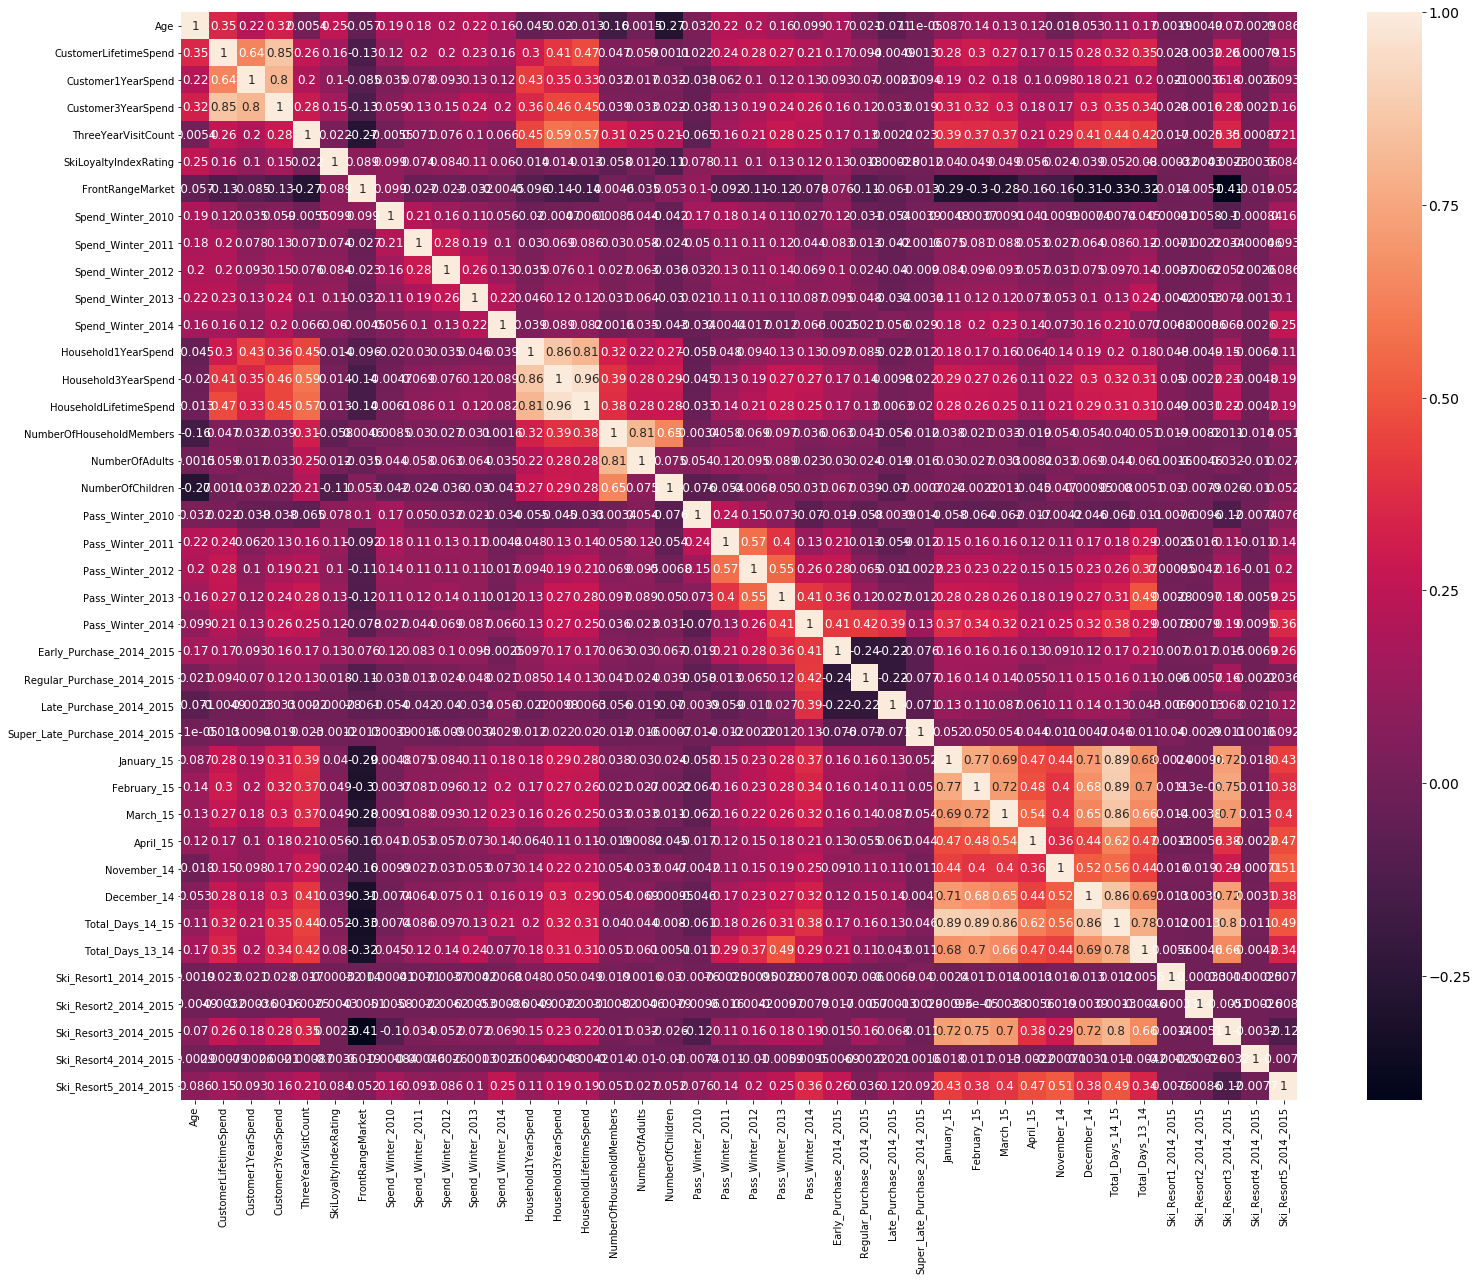

In [279]:

corr = df[cols].corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(25,20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
sns.pairplot(df)

In [323]:
df.corr().nlargest(21, 'Pass_Winter_2015')['Pass_Winter_2015']

Pass_Winter_2015            1.000000
Household3YearSpend         0.298060
Pass_Winter_2014            0.295053
ThreeYearVisitCount         0.290832
Household1YearSpend         0.287187
Customer1YearSpend          0.275944
HouseholdLifetimeSpend      0.271258
Customer3YearSpend          0.270430
Total_Days_14_15            0.268428
Early_Purchase_2014_2015    0.257241
January_15                  0.250894
February_15                 0.249487
Pass_Winter_2013            0.242583
March_15                    0.239925
Ski_Resort5_2014_2015       0.237153
Total_Days_13_14            0.233159
December_14                 0.210244
CustomerLifetimeSpend       0.197359
Pass_Winter_2012            0.164474
April_15                    0.161973
November_14                 0.150329
Name: Pass_Winter_2015, dtype: float64

In [364]:
df[cols].shape

(139616, 38)

In [365]:
df['Pass_Winter_2015'].shape

(139616,)

In [366]:
X = df[cols]
y = df['Pass_Winter_2015']

In [367]:
# TTS
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42)

In [368]:
y_train.mean()

0.46732943693177476

In [369]:
y_test.mean()

0.47086293834517534

In [370]:
### Scale Data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# Fit Scaler on X_train data from TTS
ss.fit(X_train)
# Transform X_Train data from TTS
X_train_s = ss.transform(X_train)
#Transform X_test from TTS
X_test_s = ss.transform(X_test)

In [371]:
### THIS IS HELPFUL AND USED AGAIN
# Step 1: Instantiate our model.
logreg = LogisticRegression()

# Step 2: Fit our model.
logreg.fit(X_train_s, y_train)

# After fitting: Print out intercept and coefficients.
print('Logreg intercept:', logreg.intercept_)
print('Logreg coef(s):', logreg.coef_)
print('Logreg score:', logreg.score(X_test_s,y_test))

Logreg intercept: [0.07248023]
Logreg coef(s): [[-8.12111295e-02 -4.87967734e-01  1.44218291e+00  2.74497348e-01
  -1.17078441e-01  7.68932955e-02  2.32923494e-02  5.20209961e-03
   1.45846580e-02 -1.09695956e-01 -1.40721366e-01  2.14854757e+00
  -1.24104022e+00 -1.76163831e+00  1.15005729e+00  9.03451266e-01
  -1.99049831e-01 -1.69881634e-01  1.33969752e-01  6.59998549e-02
   6.59978250e-02  2.63496466e-01  2.35083465e-02 -1.37210480e-01
  -9.35203445e-02  7.26006035e-02  1.58282430e-01  1.48886020e-01
   1.10094052e-02 -9.25607616e-02 -9.74272601e-02  6.38846379e-02
   2.98015719e-02 -1.60452336e-02 -1.23999844e-02 -1.28106584e-01
  -1.33831562e-04  2.78324009e-01]]
Logreg score: 0.731692642677057


In [372]:
#list(zip(np.exp(logreg.coef_[0]),X.columns))
list(zip(X.columns, np.exp(logreg.coef_[0])))

[('Age', 0.9219990097141934),
 ('CustomerLifetimeSpend', 0.6138726799970935),
 ('Customer3YearSpend', 4.229919267593415),
 ('ThreeYearVisitCount', 1.3158690839665215),
 ('SkiLoyaltyIndexRating', 0.8895154162836001),
 ('FrontRangeMarket', 1.0799268371692479),
 ('Spend_Winter_2010', 1.0235657346138596),
 ('Spend_Winter_2011', 1.0052156540213046),
 ('Spend_Winter_2012', 1.0146915330741069),
 ('Spend_Winter_2013', 0.8961065496324612),
 ('Spend_Winter_2014', 0.8687313361757149),
 ('Household3YearSpend', 8.57239851318079),
 ('HouseholdLifetimeSpend', 0.2890833509840072),
 ('NumberOfHouseholdMembers', 0.1717632313493918),
 ('NumberOfAdults', 3.1583738369746737),
 ('NumberOfChildren', 2.468106520864848),
 ('Pass_Winter_2010', 0.8195090550853825),
 ('Pass_Winter_2011', 0.8437646839757883),
 ('Pass_Winter_2012', 1.1433582353627938),
 ('Pass_Winter_2013', 1.0682265621990767),
 ('Pass_Winter_2014', 1.0682243937276341),
 ('Early_Purchase_2014_2015', 1.3014726955211773),
 ('Regular_Purchase_2014_201

## Code to plot importance of coefficients

In [ ]:
df.as_matrix(columns=None)
df.values

([<matplotlib.axis.XTick at 0x1a332ff240>,
 <a list of 20 Text xticklabel objects>)

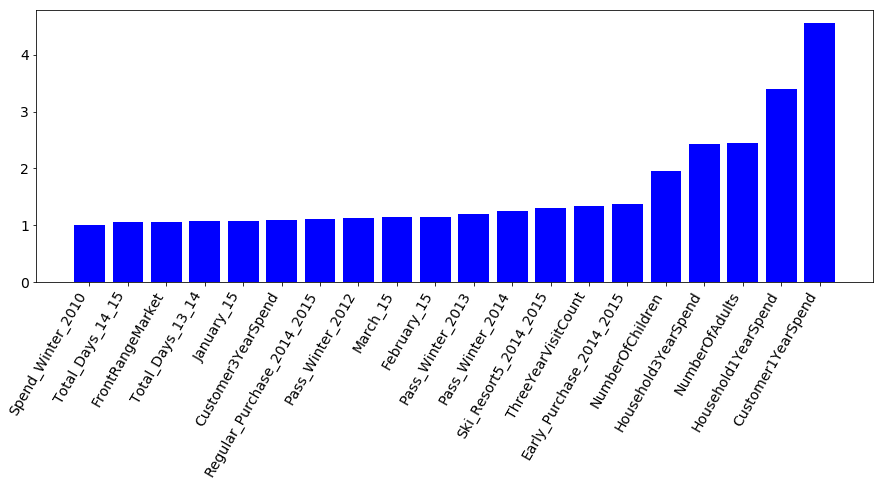

In [332]:
#coef = classifier.feature_importances_.ravel()
top_features=20
coef = np.exp(logreg.coef_[0])
top_importances = np.argsort(coef)[-top_features:]
    # create plot
plt.figure(figsize=(15, 5))
plt.bar(np.arange(top_features), coef[top_importances], color='blue')
#feature_names = np.array(feature_names)
feature_names = np.array(X.columns)
plt.xticks(
    np.arange(0, top_features),
    feature_names[top_importances],
    rotation=60, ha='right')

In [46]:
def plot_importances(classifier, feature_names, top_features=10):
    coef = classifier.feature_importances_.ravel()
    top_importances = np.argsort(coef)[-top_features:]
    # create plot
    plt.figure(figsize=(15, 5))
    plt.bar(np.arange(top_features), coef[top_importances], color='blue')
    feature_names = np.array(feature_names)
    plt.xticks(
        np.arange(0, top_features),
        feature_names[top_importances],
        rotation=60, ha='right')

In [47]:
plot_importances(logreg,X.columns)

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [291]:
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha=
            'right')
 plt.show()

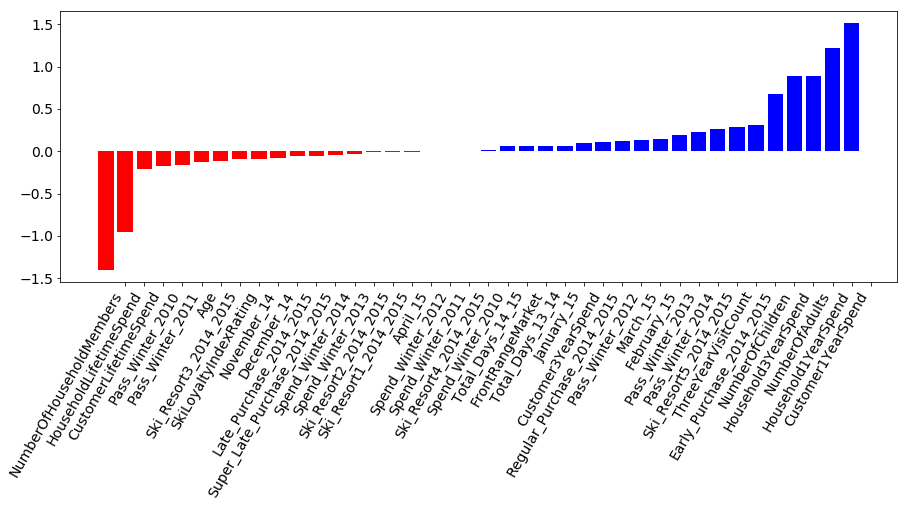

In [333]:
plot_coefficients(logreg,X.columns)

In [373]:
y_preds = logreg.predict(X_test_s)

Intercept: [0.07248023]
Regression: [[-8.12111295e-02 -4.87967734e-01  1.44218291e+00  2.74497348e-01
  -1.17078441e-01  7.68932955e-02  2.32923494e-02  5.20209961e-03
   1.45846580e-02 -1.09695956e-01 -1.40721366e-01  2.14854757e+00
  -1.24104022e+00 -1.76163831e+00  1.15005729e+00  9.03451266e-01
  -1.99049831e-01 -1.69881634e-01  1.33969752e-01  6.59998549e-02
   6.59978250e-02  2.63496466e-01  2.35083465e-02 -1.37210480e-01
  -9.35203445e-02  7.26006035e-02  1.58282430e-01  1.48886020e-01
   1.10094052e-02 -9.25607616e-02 -9.74272601e-02  6.38846379e-02
   2.98015719e-02 -1.60452336e-02 -1.23999844e-02 -1.28106584e-01
  -1.33831562e-04  2.78324009e-01]]
Accuracy of logistic regression classifier on test set: 0.73
             precision    recall  f1-score   support

          0       0.71      0.84      0.77     18469
          1       0.77      0.61      0.68     16435

avg / total       0.74      0.73      0.73     34904



Text(0.5,11,'Predicted label')

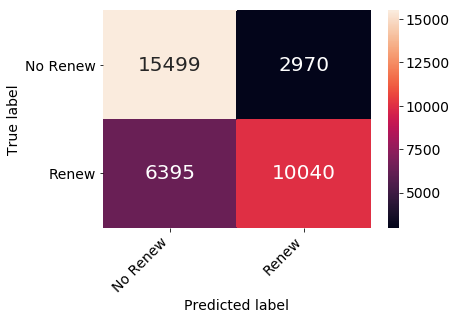

In [374]:
confusion_matrix_s = confusion_matrix(y_test, y_preds)
print('Intercept: ' + str(logreg.intercept_))
print('Regression: ' + str(logreg.coef_))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_s, y_test)))
print(classification_report(y_test, y_preds))
 
confusion_matrix_df = pd.DataFrame(confusion_matrix_s, ('No Renew', 'Renew'), ('No Renew', 'Renew'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

### XGBoost Model

In [375]:
from xgboost import XGBClassifier

In [376]:
# fit model to training data
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

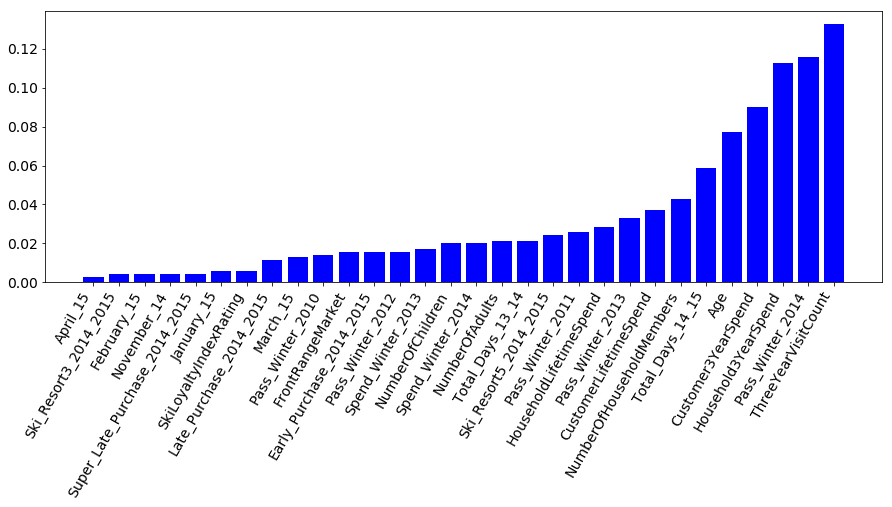

In [377]:
plot_importances(XGB,X.columns,30)

In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [256]:
XGB.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

AttributeError: 'XGBClassifier' object has no attribute 'plot_tree'

In [378]:
predictions = XGB.predict(X_test)

/Users/craigstrong/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [379]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.20%


             precision    recall  f1-score   support

          0       0.84      0.80      0.82     18469
          1       0.78      0.83      0.81     16435

avg / total       0.81      0.81      0.81     34904



Text(0.5,11,'Predicted label')

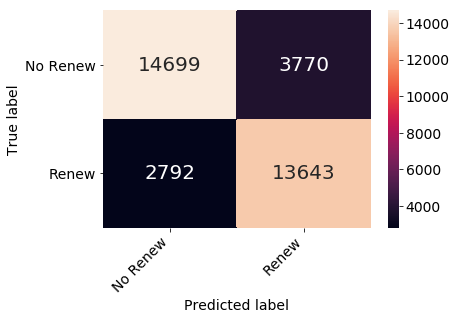

In [380]:
confusion_matrix_XGB = confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))
 
confusion_matrix_df = pd.DataFrame(confusion_matrix_XGB, ('No Renew', 'Renew'), ('No Renew', 'Renew'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

In [205]:
confusion_matrix_XGB = confusion_matrix(y_test, predictions)
### Turns numpy array into df and assigns columns and row indexes to make it easier to read
pd.DataFrame(confusion_matrix_XGB, columns=['predicted no Renew','predicted Renew'],
             index = ['actual no Renew','actual Renew'])

,predicted no Renew,predicted Renew
actual no Renew,2048,462
actual Renew,317,3383


In [134]:
def get_confusion_metric(row):
    
    if row['actual_y'] == 1.0 and row['predicted_label'] == 1.0:
        row['confusion_metric'] = "True Positive"
    if row['actual_y'] == 1.0 and row['predicted_label'] == 0.0:
        row['confusion_metric'] = "False Negative"
        
    if row['actual_y'] == 0.0 and row['predicted_label'] == 0.0:
        row['confusion_metric'] = "True Negative"
    if row['actual_y'] == 0.0 and row['predicted_label'] == 1.0:
        row['confusion_metric'] = "False Positive"
        
    return row

In [381]:
predictions = XGB.predict(X_test)
predictions_proba = XGB.predict_proba(X_test)

df_xg = pd.DataFrame(y_test)
df_xg.loc[:, 'actual_y'] = y
df_xg.loc[:, 'predicted_label'] = predictions
df_xg.loc[:, 'predicted_proba'] = predictions_proba[:, 1]
df_xg.head()

/Users/craigstrong/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Pass_Winter_2015,actual_y,predicted_label,predicted_proba
33735,1,1,0,0.409219
89699,0,0,0,0.094691
104196,1,1,1,0.733845
87504,0,0,0,0.197052
32690,1,1,1,0.591669


In [302]:
# Threshold of .5
df_xg.loc[:,'predicted_label'] = df_xg['predicted_proba'].map(lambda p: 1 if p > .5 else 0)
df_xg.apply(get_confusion_metric, axis = 1)['confusion_metric'].value_counts().sort_index()
#df_xgb.head(20)

False Negative    1212
False Positive    1505
True Negative     6150
True Positive     7438
Name: confusion_metric, dtype: int64

In [208]:
# Threshold of .25
df_xg.loc[:,'predicted_label'] = df_xg['predicted_proba'].map(lambda p: 1 if p > .25 else 0)
df_xg.apply(get_confusion_metric, axis = 1)['confusion_metric'].value_counts().sort_index()
#df_xgb.head(20)

False Negative     141
False Positive     758
True Negative     1752
True Positive     3559
Name: confusion_metric, dtype: int64

In [346]:
# Threshold of .65
df_xg.loc[:,'predicted_label'] = df_xg['predicted_proba'].map(lambda p: 1 if p > .65 else 0)
df_xg.apply(get_confusion_metric, axis = 1)['confusion_metric'].value_counts().sort_index()
#df_xgb.head(20)

False Negative     4202
False Positive     1801
True Negative     16668
True Positive     12233
Name: confusion_metric, dtype: int64

In [303]:
# Threshold of .85
df_xg.loc[:,'predicted_label'] = df_xg['predicted_proba'].map(lambda p: 1 if p > .85 else 0)
df_xg.apply(get_confusion_metric, axis = 1)['confusion_metric'].value_counts().sort_index()
#df_xgb.head(20)

False Negative    3926
False Positive     247
True Negative     7408
True Positive     4724
Name: confusion_metric, dtype: int64

/Users/craigstrong/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


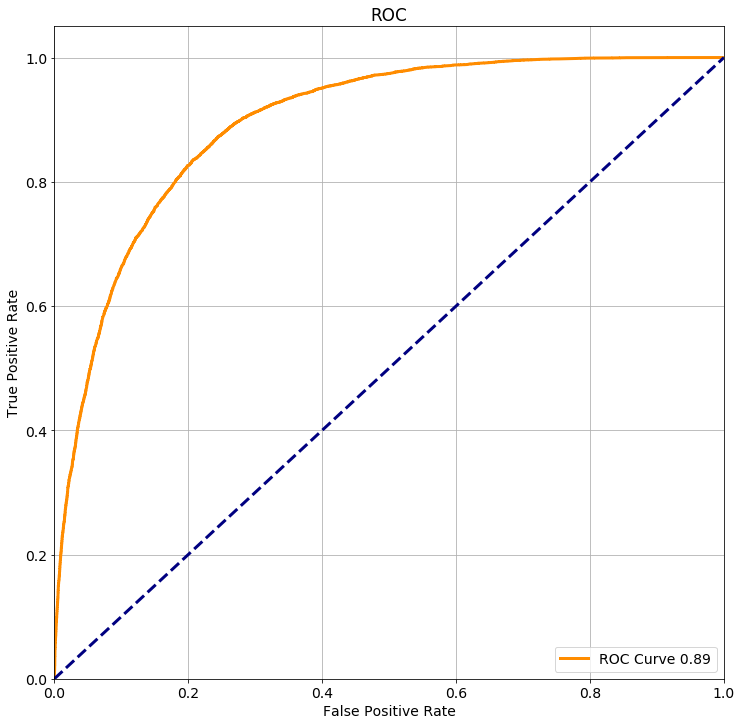

AUC: 0.8942906311092533


In [382]:
# Generate False positive rate and True positive rate
tpr, fpr, thresholds = roc_curve(y_test,df_xg['predicted_proba'], pos_label=0)
roc_auc = metrics.auc(fpr, tpr)

# Plot 
plt.figure(figsize=(12,12))
line_width = 3

plt.plot(fpr, tpr, lw = line_width, color="darkorange", label = "ROC Curve %.2f" % roc_auc)
plt.plot([0,1], [0, 1], lw = line_width, linestyle="--", color="navy")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.grid("True")
plt.legend(loc="lower right")
plt.show()

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

In [170]:
def roc(probas, true, step=0.01):
    """
    probas should be a numpy array of predict_probas
    true is a pandas series of true labels
    step is the step size for checking thresholds
    """
    
    probas = probas[:,1]  # The output of predict_proba() is an array of the probabilities for every class, but we only want the probabilities for class 1
    true = true.values    # We need to convert the class labels from a Pandas Series to a numpy array. We do this using the .values attribute
    assert(len(probas) == len(true)) # We're making sure that our probabilities vector is the same length as our true class labesl vector
    
    TPRs = [] # Setting up empty list of True Positive Rate
    FPRs = [] # Setting up empty list of False Positive Rate
    
    for i in np.arange(0.0,1.0,step): # np.arange allows us to use step sizes that are decimals
        preds_class = probas > i # Numpy arrays have a feature called 'broadcasting.' Check the documentation: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html to see what this does.
        TP = 0 
        FP = 0
        TN = 0
        FN = 0
        for index in range(len(preds_class)): # We're comparing each prediction with each true value here

            if preds_class[index] == 1 and true[index] == 1:
                TP += 1
            elif preds_class[index] == 1 and true[index] == 0:
                FP += 1
            elif preds_class[index] == 0 and true[index] == 0:
                TN += 1 
            elif preds_class[index] == 0 and true[index] == 1:
                FN += 1
                
        TPR = TP/(TP + FN) # Calculating TPR and FPR and appending to our lists
        FPR = FP/(FP + TN)
        
        TPRs.append(TPR)
        FPRs.append(FPR)
         
    plt.rcParams['font.size'] = 14
    plt.plot(FPRs, TPRs, color="orange")
    plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('Receiver Operating Characteristic')
    plt.xlabel("False Positive Rate (1 - Specificity)")
    plt.ylabel("True Positive Rate (Sensitivity)")
    plt.show();

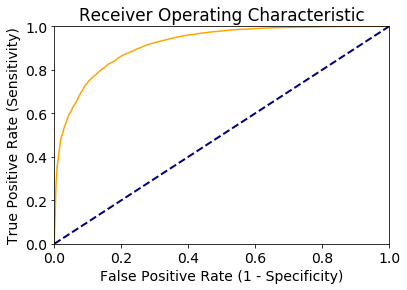

In [306]:
probabilities = XGB.predict_proba(X_test)

roc(probas = probabilities, # pass in series of probabilities 
    true = y_test,          # pass in series of true values
    step=0.01); 

In [109]:
predictions = XGB.predict(X_test)
predictions_proba = XGB.predict_proba(X_test)

df_xg = pd.DataFrame(y_test)
df_xg.loc[:, 'actual_y'] = y
df_xg.loc[:, 'predicted_label'] = predictions
df_xg.loc[:, 'predicted_proba'] = predictions_proba[:, 1]
df_xg.head()

/Users/craigstrong/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Pass_Winter_2015,actual_y,predicted_label,predicted_proba
14218,0,0,0,0.010601
23079,1,1,1,0.686414
20004,0,0,0,0.039845
8483,0,0,0,0.060320
16688,1,1,1,0.853845


In [383]:
df_xg[['actual_y', 'predicted_label','predicted_proba']].assign(NE=df_xg.actual_y != df_xg.predicted_label)

,actual_y,predicted_label,predicted_proba,NE
33735,1,0,0.409219,True
89699,0,0,0.094691,False
104196,1,1,0.733845,False
87504,0,0,0.197052,False
32690,1,1,0.591669,False
78246,1,1,0.833994,False
17723,1,1,0.884200,False
100081,0,0,0.098592,False
109678,1,0,0.221954,True
100607,0,0,0.050251,False


In [384]:
# pull out ID before TTS
# Join id to X_TEST where INDEXES are equal

df_xgb = pd.merge(df, df_xg, left_index=True, right_index=True)

In [385]:
df_xgb.shape

(34904, 49)

In [386]:
df_xg.shape

(34904, 4)

In [387]:
df_xgb.head()

,Age,StateProvinceCode,CustomerLifetimeSpend,Customer1YearSpend,Customer3YearSpend,ThreeYearVisitCount,SkiLoyaltyIndexRating,FrontRangeMarket,CustId,Spend_Winter_2010,...,Total_Days_13_14,Ski_Resort1_2014_2015,Ski_Resort2_2014_2015,Ski_Resort3_2014_2015,Ski_Resort4_2014_2015,Ski_Resort5_2014_2015,Pass_Winter_2015_y,actual_y,predicted_label,predicted_proba
0,42,CO,55.61,0.0,42.43,19,10.0,1,1073873,0.0,...,0,0,0,0,0,7,1,1,1,0.848426
4,24,CO,148.19,0.0,148.19,2,0.0,1,1073956,0.0,...,0,0,0,0,0,4,0,0,0,0.085426
23,30,CO,0.00,0.0,0.00,0,0.0,1,1075160,0.0,...,0,0,0,0,0,0,0,0,0,0.047365
31,30,CO,918.00,0.0,918.00,17,10.0,1,1075645,0.0,...,1,0,0,0,0,3,1,1,1,0.569073
33,37,CO,958.00,0.0,0.00,0,0.0,1,1075678,0.0,...,0,0,0,0,0,0,0,0,0,0.011723


In [388]:
pd.DataFrame(df_xgb).to_csv('CO_2015_2016_XGB.csv', index=False)

## Decision Tree model

In [389]:
tree = DecisionTreeClassifier(criterion='gini')
DT = tree.fit(X_train, y_train)

In [390]:
DT.score(X_train, y_train)

0.9991309496523798

In [391]:
DT.score(X_test, y_test)

0.8067270226908091

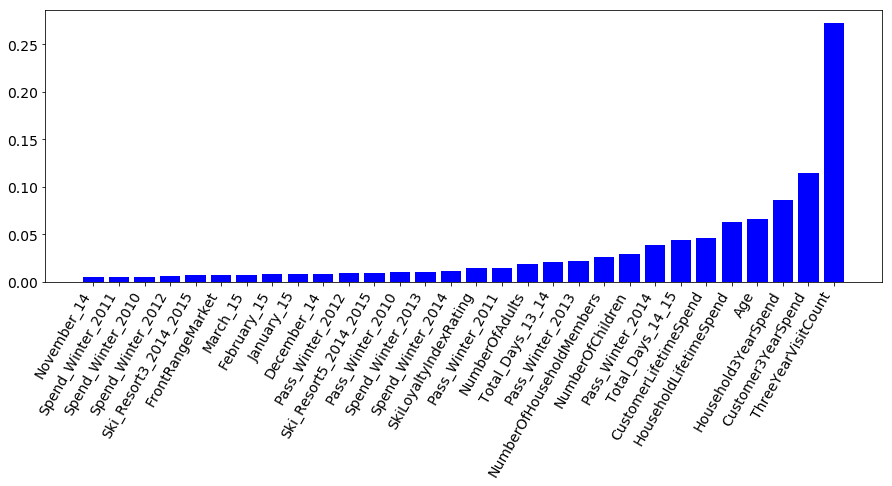

In [392]:
plot_importances(DT, X_test.columns, 30)

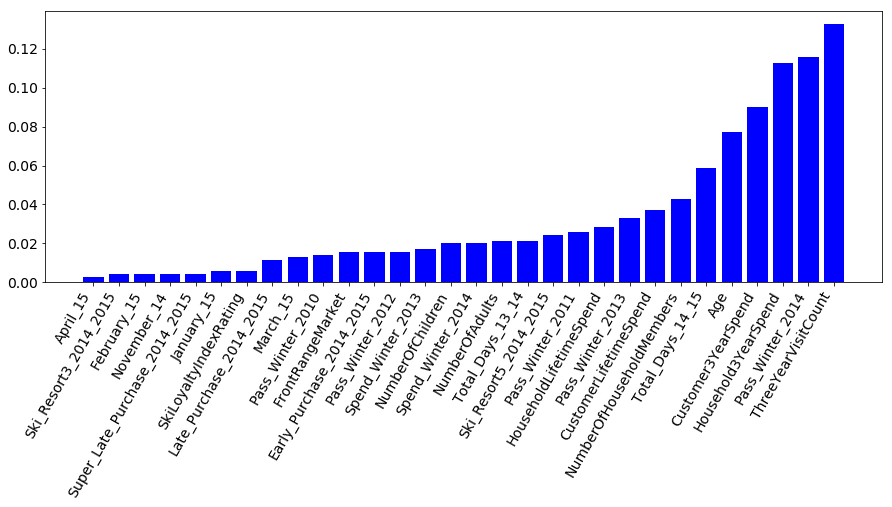

In [393]:
plot_importances(XGB,X.columns,30)

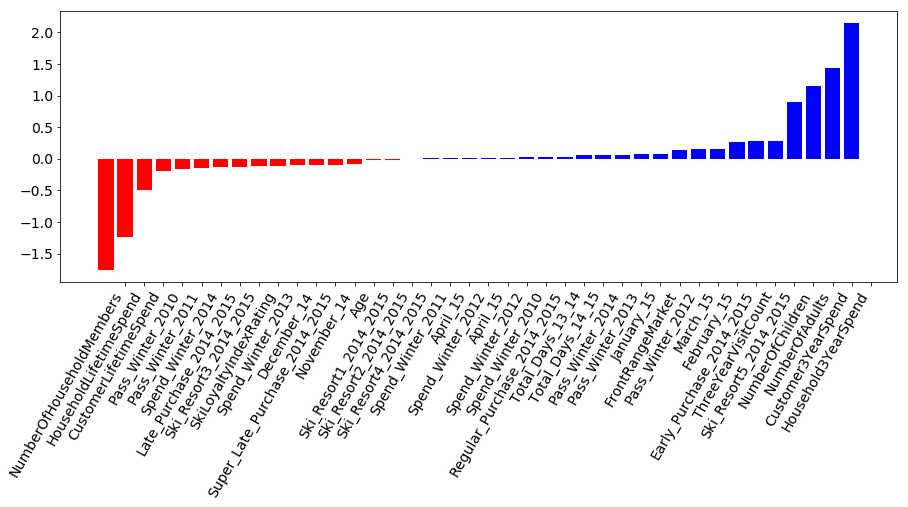

In [394]:
plot_coefficients(logreg,X.columns)

In [360]:
# make predictions for test data
y_pred_DT = DT.predict(X_test)
predictions_DT = [round(value) for value in y_pred_DT]

In [361]:

# evaluate predictions
accuracy = accuracy_score(y_test, predictions_DT)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.50%


             precision    recall  f1-score   support

          0       0.85      0.85      0.85     18469
          1       0.83      0.84      0.84     16435

avg / total       0.84      0.84      0.84     34904



Text(0.5,11,'Predicted label')

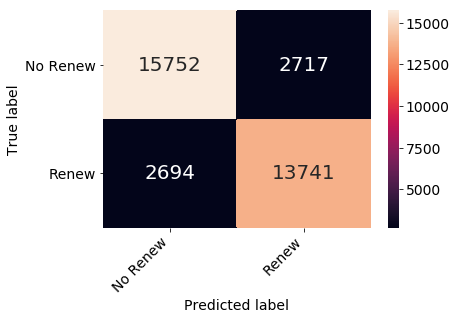

In [362]:
confusion_matrix_DT = confusion_matrix(y_test, predictions_DT)
print(classification_report(y_test, predictions_DT))
 
confusion_matrix_df = pd.DataFrame(confusion_matrix_DT, ('No Renew', 'Renew'), ('No Renew', 'Renew'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

In [74]:
predictions = DT.predict(X_test)
predictions_proba = DT.predict_proba(X_test)

df_dt = pd.DataFrame(y_test)
df_dt.loc[:, 'actual_y'] = y
df_dt.loc[:, 'predicted_label'] = predictions
df_dt.loc[:, 'predicted_proba'] = predictions_proba[:, 1]
df_dt.head()

,Pass_Winter_2015,actual_y,predicted_label,predicted_proba
14218,0,0,0,0.0
23079,1,1,1,1.0
20004,0,0,0,0.0
8483,0,0,0,0.0
16688,1,1,1,1.0
